In [1]:
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from MDAnalysis.analysis import rms

import pandas as pd
# the next line is necessary to display plots in Jupyter
%matplotlib inline

In [2]:
def get_Rg(filename):
    f = open(filename, 'r')
    gyr_data = []
    for line in f:
        if line[0] == "#" or line[0] == "@":
            continue
        tmp = line.split()
        gyr_data.append((int(tmp[0]), float(tmp[1])))
    f.close()
    return np.array(gyr_data).T

## ASPARTATE

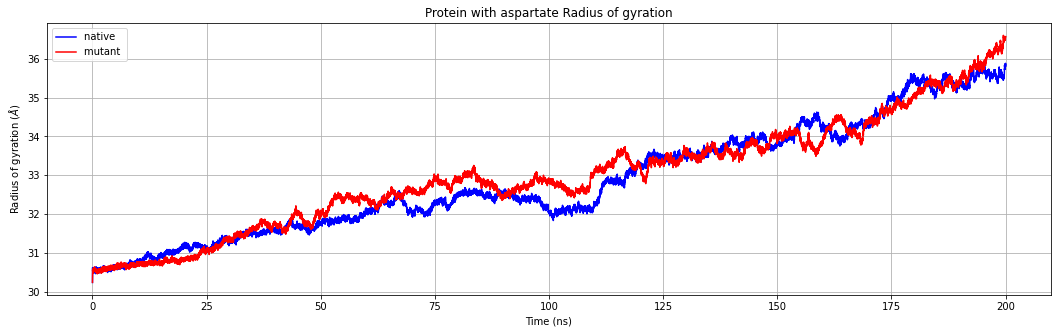

In [3]:
Rg_native_asp = get_Rg('gyrate_WTasp.xvg')
Rg_mutant_asp = get_Rg('gyrate_MTasp.xvg')

rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_native_asp[0] / 1000, Rg_native_asp[1] * 10, color = 'blue', label = 'native ')
ax1.plot(Rg_mutant_asp[0] / 1000, Rg_mutant_asp[1] * 10, color = 'red', label = 'mutant ')
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Radius of gyration ($\AA$)')
ax1.set_title('Protein with aspartate Radius of gyration')
ax1.grid(5)
ax1.legend();
rg_plot.savefig('Rg_asp.png', dpi = 500)

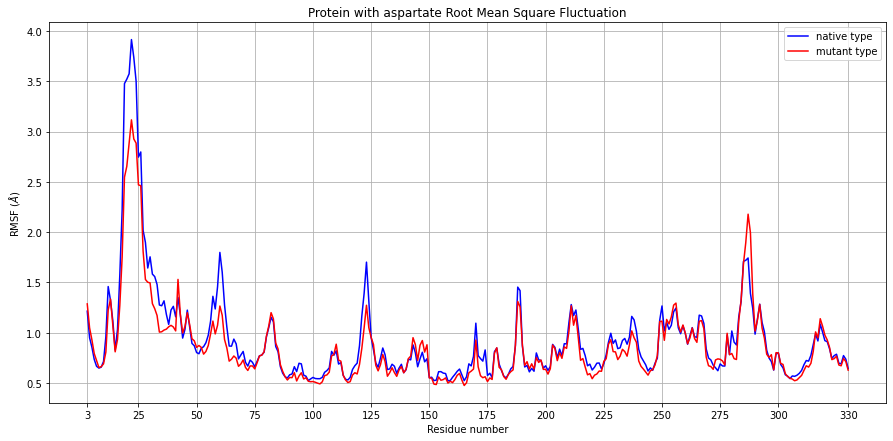

In [4]:
file = open('rmsf_MTasp.xvg')
rmsf_MTasp = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_MTasp.keys():
        rmsf_MTasp[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_MTasp[tmp[0]] = float(tmp[1])
file.close()
for key, val in rmsf_MTasp.items():
    rmsf_MTasp[key] = val / 4 * 10
    
file = open('rmsf_WTasp.xvg')
rmsf_WTasp = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_WTasp.keys():
        rmsf_WTasp[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_WTasp[tmp[0]] = float(tmp[1])
file.close()
for key, val in rmsf_WTasp.items():
    rmsf_WTasp[key] = val / 4 * 10
    
rmsf_plot_asp = plt.figure(figsize = (15, 7))
ax = rmsf_plot_asp.add_subplot(1, 1, 1)
x_scale = [int(x) for x in rmsf_WTasp.keys()]
x_ticks = [3, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 330]
ax.plot(x_scale, rmsf_WTasp.values(), color = 'blue', label = 'native type')
ax.plot(x_scale, rmsf_MTasp.values(), color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF ($\AA$)')
ax.set_title('Protein with aspartate Root Mean Square Fluctuation')
ax.set_xticks(x_ticks)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsf_plot_asp.savefig('RMSF_asp.png', dpi = 500)

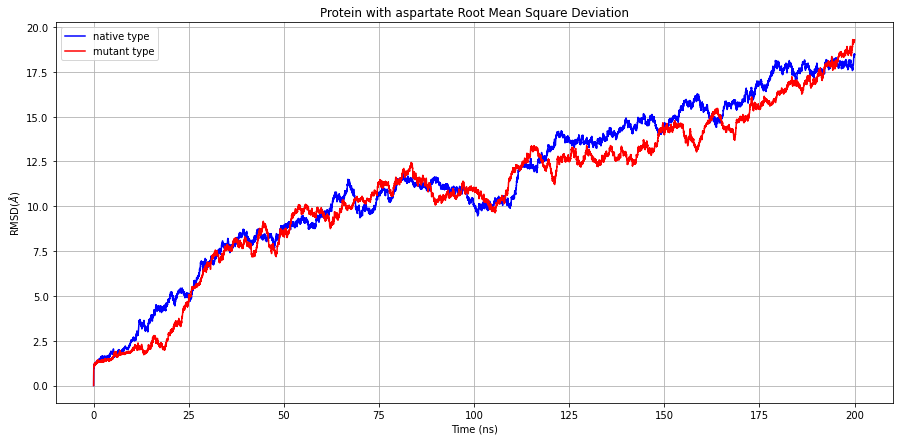

In [5]:
rmsd_WTasp = []
file = open('rmsd_WTasp.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_WTasp.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_WTasp = np.array(rmsd_WTasp).T

rmsd_MTasp = []
file = open('rmsd_MTasp.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_MTasp.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_MTasp = np.array(rmsd_MTasp).T


rmsd_asp = plt.figure(figsize = (15, 7))
ax = rmsd_asp.add_subplot(1, 1, 1)
ax.plot(rmsd_WTasp[0] / 1000, rmsd_WTasp[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsd_MTasp[0] / 1000, rmsd_MTasp[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD($\AA$)')
ax.set_title('Protein with aspartate Root Mean Square Deviation')
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsd_asp.savefig('RMSD_asp.png', dpi = 500, backend = 'cairo')

## ASPARAGINE

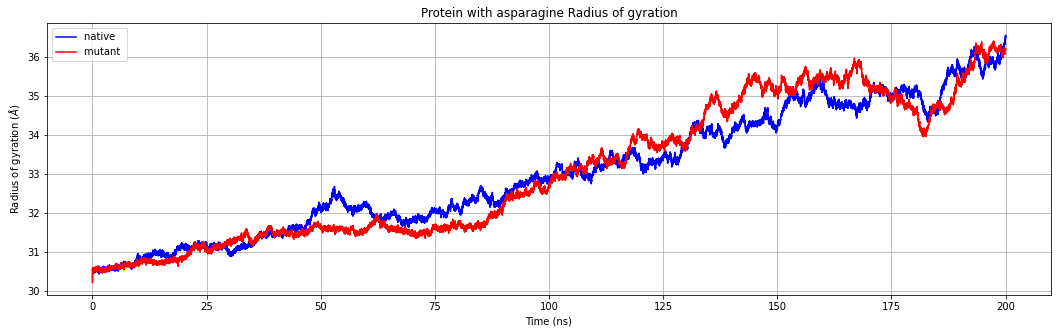

In [6]:
Rg_WTasn = get_Rg('gyrate_WTasn.xvg')
Rg_MTasn = get_Rg('gyrate_MTasn.xvg')

rg_plot_asn = plt.figure(figsize = (18, 5))
ax1 = rg_plot_asn.add_subplot(1, 1, 1)
ax1.plot(Rg_WTasn[0] / 1000, Rg_WTasn[1] * 10, color = 'blue', label = 'native ')
ax1.plot(Rg_MTasn[0] / 1000, Rg_MTasn[1] * 10, color = 'red', label = 'mutant ')
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Radius of gyration ($\AA$)')
ax1.set_title('Protein with asparagine Radius of gyration')
ax1.grid(5)
ax1.legend();
rg_plot_asn.savefig('Rg_asn.png', dpi = 500)

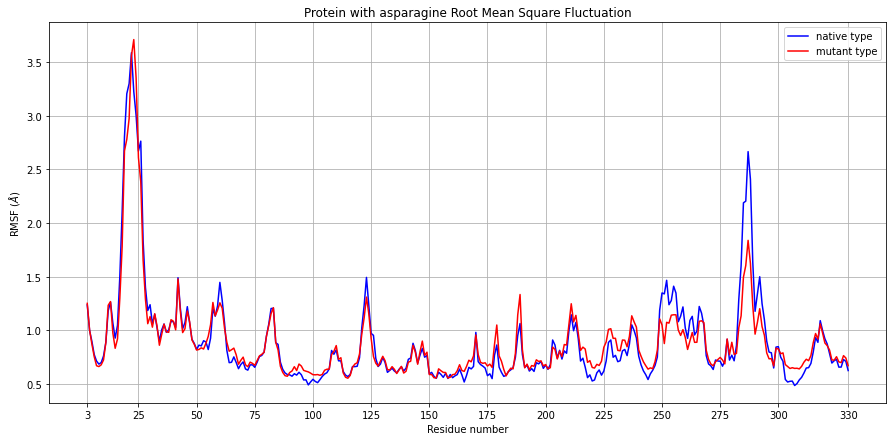

In [7]:
file = open('rmsf_MTasn.xvg')
rmsf_MTasn = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_MTasn.keys():
        rmsf_MTasn[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_MTasn[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_MTasn)
for key, val in rmsf_MTasn.items():
    rmsf_MTasn[key] = val / 4 * 10


file = open('rmsf_WTasn.xvg')
rmsf_WTasn = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_WTasn.keys():
        rmsf_WTasn[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_WTasn[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_WTasn)
for key, val in rmsf_WTasn.items():
    rmsf_WTasn[key] = val / 4 * 10

rmsf_plot_asn = plt.figure(figsize = (15, 7))
ax = rmsf_plot_asn.add_subplot(1, 1, 1)
x_scale = [int(x) for x in rmsf_WTasn.keys()]
x_ticks = [3, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 330]
ax.plot(x_scale, rmsf_WTasn.values(), color = 'blue', label = 'native type')
ax.plot(x_scale, rmsf_MTasn.values(), color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF ($\AA$)')
ax.set_title('Protein with asparagine Root Mean Square Fluctuation')
ax.set_xticks(x_ticks)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsf_plot_asn.savefig('RMSF_asn.png', dpi = 500)

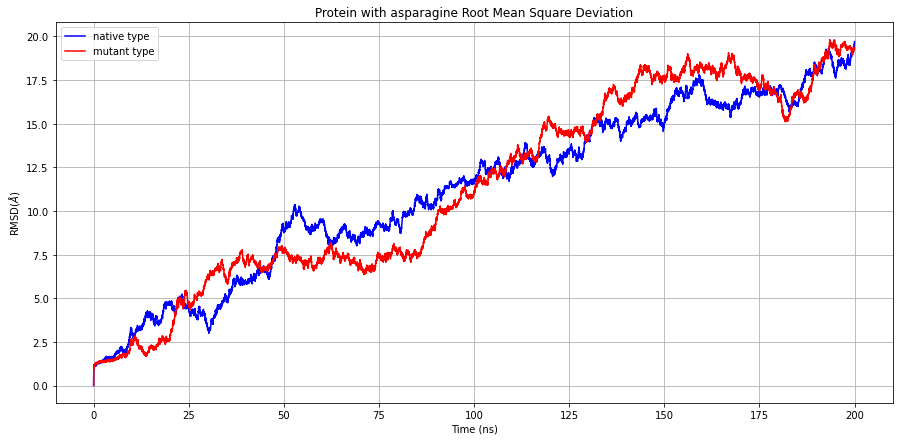

In [8]:
rmsd_WTasn = []
file = open('rmsd_WTasn.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_WTasn.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_WTasn = np.array(rmsd_WTasn).T

rmsd_MTasn = []
file = open('rmsd_MTasn.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_MTasn.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_MTasn = np.array(rmsd_MTasn).T


rmsd_asn = plt.figure(figsize = (15, 7))
ax = rmsd_asn.add_subplot(1, 1, 1)
ax.plot(rmsd_WTasn[0] / 1000, rmsd_WTasn[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsd_MTasn[0] / 1000, rmsd_MTasn[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD($\AA$)')
ax.set_title('Protein with asparagine Root Mean Square Deviation')
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsd_asn.savefig('RMSD_asn.png', dpi = 500, backend = 'cairo')

## GLUTAMINE

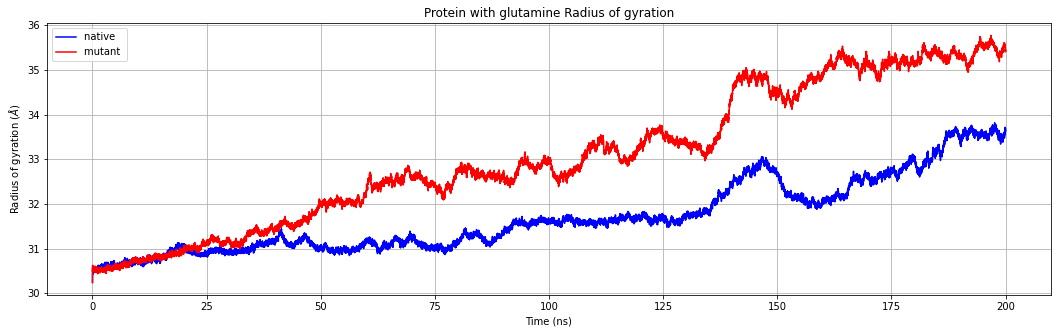

In [9]:
Rg_WTgln = get_Rg('gyrate_WTgln.xvg')
Rg_MTgln = get_Rg('gyrate_MTgln.xvg')

rg_plot_gln = plt.figure(figsize = (18, 5))
ax1 = rg_plot_gln.add_subplot(1, 1, 1)
ax1.plot(Rg_WTgln[0] / 1000, Rg_WTgln[1] * 10, color = 'blue', label = 'native ')
ax1.plot(Rg_MTgln[0] / 1000, Rg_MTgln[1] * 10, color = 'red', label = 'mutant ')
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Radius of gyration ($\AA$)')
ax1.set_title('Protein with glutamine Radius of gyration')
ax1.grid(5)
ax1.legend();
rg_plot_gln.savefig('Rg_gln.png', dpi = 500)

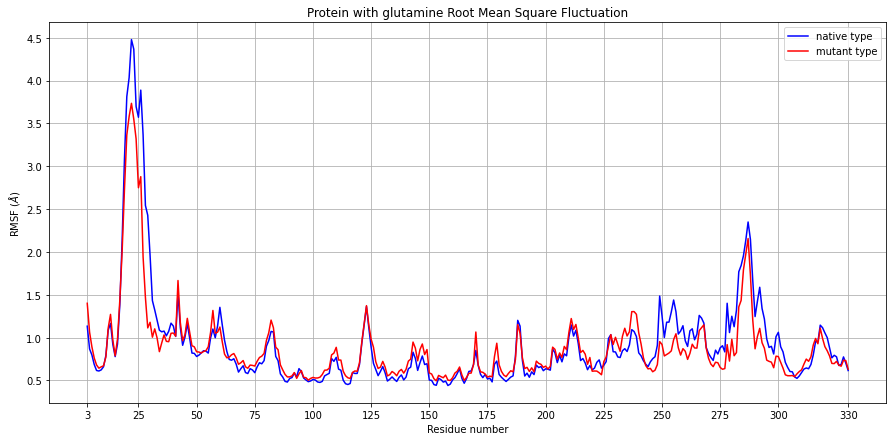

In [10]:
file = open('rmsf_MTgln.xvg')
rmsf_MTgln = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_MTgln.keys():
        rmsf_MTgln[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_MTgln[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_MTgln)
for key, val in rmsf_MTgln.items():
    rmsf_MTgln[key] = val / 4 * 10


file = open('rmsf_WTgln.xvg')
rmsf_WTgln = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_WTgln.keys():
        rmsf_WTgln[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_WTgln[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_WTgln)
for key, val in rmsf_WTgln.items():
    rmsf_WTgln[key] = val / 4 * 10

rmsf_plot_gln = plt.figure(figsize = (15, 7))
ax = rmsf_plot_gln.add_subplot(1, 1, 1)
x_scale = [int(x) for x in rmsf_WTgln.keys()]
x_ticks = [3, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 330]
ax.plot(x_scale, rmsf_WTgln.values(), color = 'blue', label = 'native type')
ax.plot(x_scale, rmsf_MTgln.values(), color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF ($\AA$)')
ax.set_title('Protein with glutamine Root Mean Square Fluctuation')
ax.set_xticks(x_ticks)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsf_plot_gln.savefig('RMSF_gln.png', dpi = 500)

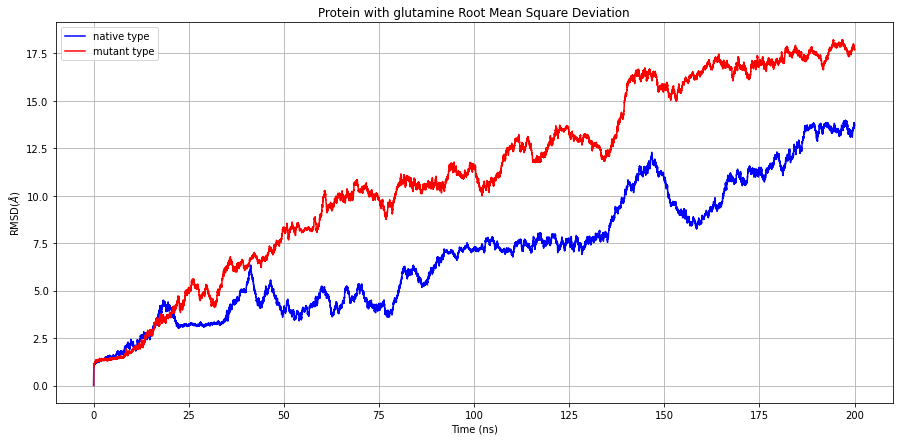

In [11]:
rmsd_WTgln = []
file = open('rmsd_WTgln.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_WTgln.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_WTgln = np.array(rmsd_WTgln).T

rmsd_MTgln = []
file = open('rmsd_MTgln.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_MTgln.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_MTgln = np.array(rmsd_MTgln).T


rmsd_gln = plt.figure(figsize = (15, 7))
ax = rmsd_gln.add_subplot(1, 1, 1)
ax.plot(rmsd_WTgln[0] / 1000, rmsd_WTgln[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsd_MTgln[0] / 1000, rmsd_MTgln[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD($\AA$)')
ax.set_title('Protein with glutamine Root Mean Square Deviation')
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsd_gln.savefig('RMSD_gln.png', dpi = 500, backend = 'cairo')

## GLUTAMATE

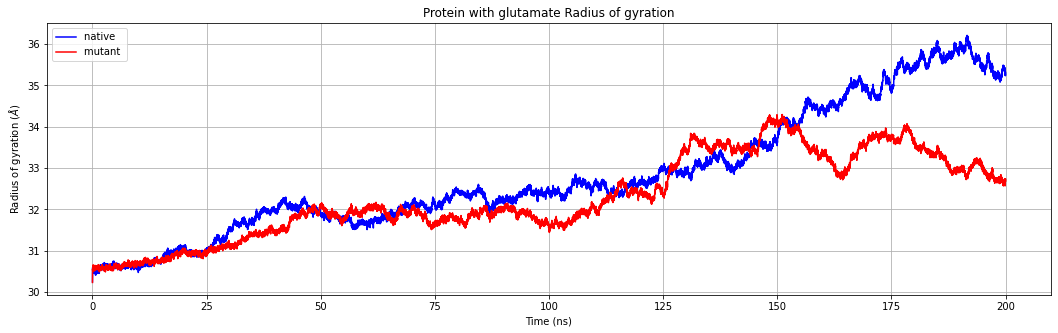

In [12]:
Rg_WTglu = get_Rg('gyrate_WTglu.xvg')
Rg_MTglu = get_Rg('gyrate_MTglu.xvg')


rg_plot_glu = plt.figure(figsize = (18, 5))
ax1 = rg_plot_glu.add_subplot(1, 1, 1)
ax1.plot(Rg_WTglu[0] / 1000, Rg_WTglu[1] * 10, color = 'blue', label = 'native ')
ax1.plot(Rg_MTglu[0] / 1000, Rg_MTglu[1] * 10, color = 'red', label = 'mutant ')
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Radius of gyration ($\AA$)')
ax1.set_title('Protein with glutamate Radius of gyration')
ax1.grid(5)
ax1.legend();
rg_plot_glu.savefig('Rg_glu.png', dpi = 500)

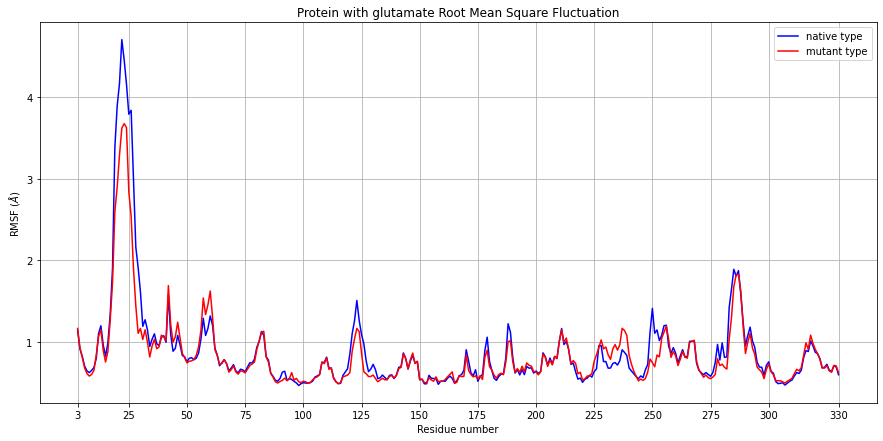

In [13]:
file = open('rmsf_MTglu.xvg')
rmsf_MTglu = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_MTglu.keys():
        rmsf_MTglu[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_MTglu[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_MTglu)
for key, val in rmsf_MTglu.items():
    rmsf_MTglu[key] = val / 4 * 10


file = open('rmsf_WTglu.xvg')
rmsf_WTglu = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_WTglu.keys():
        rmsf_WTglu[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_WTglu[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_WTglu)
for key, val in rmsf_WTglu.items():
    rmsf_WTglu[key] = val / 4 * 10

rmsf_plot_glu = plt.figure(figsize = (15, 7))
ax = rmsf_plot_glu.add_subplot(1, 1, 1)
x_scale = [int(x) for x in rmsf_WTglu.keys()]
x_ticks = [3, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 330]
ax.plot(x_scale, rmsf_WTglu.values(), color = 'blue', label = 'native type')
ax.plot(x_scale, rmsf_MTglu.values(), color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number')
ax.set_ylabel('RMSF ($\AA$)')
ax.set_title('Protein with glutamate Root Mean Square Fluctuation')
ax.set_xticks(x_ticks)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsf_plot_glu.savefig('RMSF_glu.png', dpi = 500)

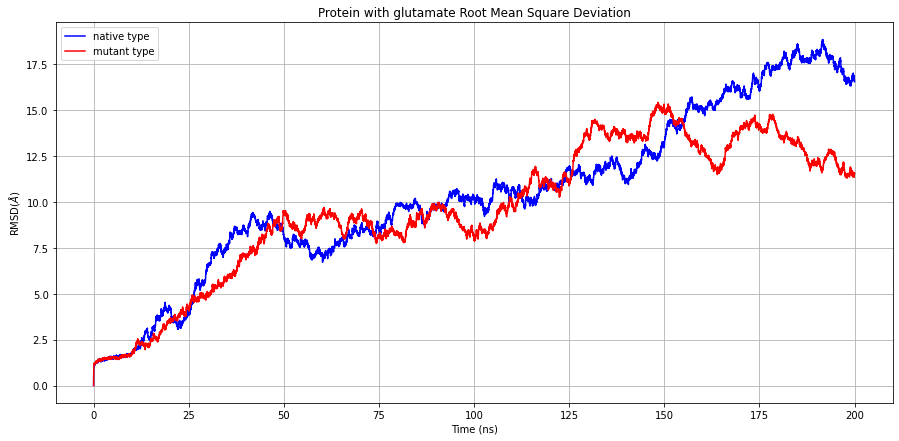

In [14]:
rmsd_WTglu = []
file = open('rmsd_WTglu.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_WTglu.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_WTglu = np.array(rmsd_WTglu).T

rmsd_MTglu = []
file = open('rmsd_MTglu.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_MTglu.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_MTglu = np.array(rmsd_MTglu).T


rmsd_glu = plt.figure(figsize = (15, 7))
ax = rmsd_glu.add_subplot(1, 1, 1)
ax.plot(rmsd_WTglu[0] / 1000, rmsd_WTglu[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsd_MTglu[0] / 1000, rmsd_MTglu[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Time (ns)')
ax.set_ylabel('RMSD($\AA$)')
ax.set_title('Protein with glutamate Root Mean Square Deviation')
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend()
rmsd_glu.savefig('RMSD_glu.png', dpi = 500, backend = 'cairo')

## LAST 50 ns analysis

In [45]:
label_regions = [x for x in range(21, 42)]
label_regions.extend([x for x in range(56, 59)])
label_regions.extend([x for x in range(80, 83)])
label_regions.extend([x for x in range(207, 213)])
label_regions.extend([x for x in range(231, 236)])
label_regions.extend([x for x in range(246, 258)])
label_regions.extend([x for x in range(281, 290)])
print(type(label_regions[0]))

<class 'int'>


## ASPARTATE

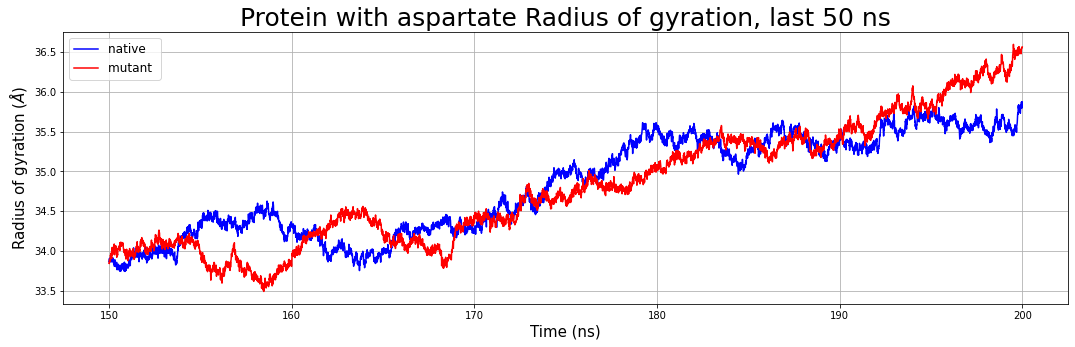

In [15]:
Rg_native_asp_50ns = get_Rg('gyrate_WTasp_50ns.xvg')
Rg_mutant_asp_50ns = get_Rg('gyrate_MTasp_50ns.xvg')

rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_native_asp_50ns[0] / 1000, Rg_native_asp_50ns[1] * 10, color = 'blue', label = 'native ')
ax1.plot(Rg_mutant_asp_50ns[0] / 1000, Rg_mutant_asp_50ns[1] * 10, color = 'red', label = 'mutant ')
ax1.set_xlabel('Time (ns)', fontsize = 15)
ax1.set_ylabel('Radius of gyration ($\AA$)', fontsize = 15)
ax1.set_title('Protein with aspartate Radius of gyration, last 50 ns', fontsize = 25)
ax1.grid(5)
ax.tick_params(labelsize = 10)
ax1.legend(fontsize = 12)
rg_plot.savefig('Rg_asp_50ns.png', dpi = 500)

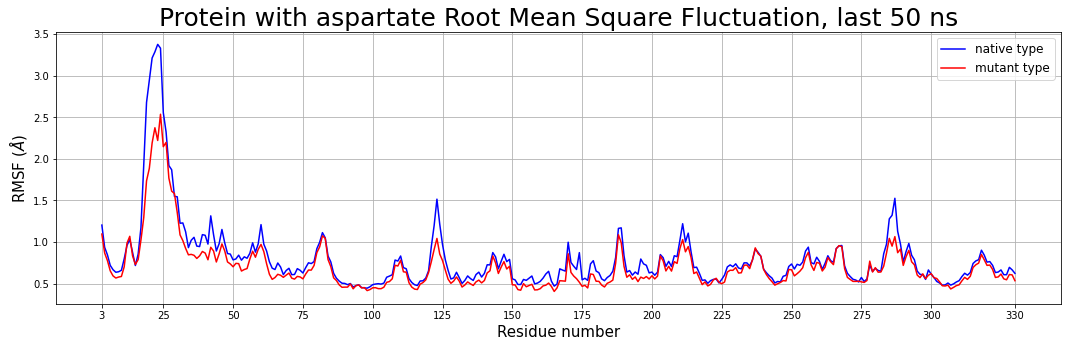

In [16]:
file = open('rmsf_MTasp_50ns.xvg')
rmsf_MTasp_50ns = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_MTasp_50ns.keys():
        rmsf_MTasp_50ns[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_MTasp_50ns[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_MTasp_50ns)
for key, val in rmsf_MTasp_50ns.items():
    rmsf_MTasp_50ns[key] = val / 4 * 10

file = open('rmsf_WTasp_50ns.xvg')
rmsf_WTasp_50ns = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_WTasp_50ns.keys():
        rmsf_WTasp_50ns[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_WTasp_50ns[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_WTasp_50ns)
for key, val in rmsf_WTasp_50ns.items():
    rmsf_WTasp_50ns[key] = val / 4 * 10
    

rmsf_plot_asp_50ns = plt.figure(figsize = (18, 5))
ax = rmsf_plot_asp_50ns.add_subplot(1, 1, 1)
x_scale = [int(x) for x in rmsf_WTasp_50ns.keys()]
x_ticks = [3, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 330]
ax.plot(x_scale, rmsf_WTasp_50ns.values(), color = 'blue', label = 'native type')
ax.plot(x_scale, rmsf_MTasp_50ns.values(), color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number', fontsize = 15)
ax.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax.set_title('Protein with aspartate Root Mean Square Fluctuation, last 50 ns', fontsize = 25)
ax.set_xticks(x_ticks)
ax.tick_params(labelsize = 10)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend(fontsize = 12)

rmsf_plot_asp_50ns.savefig('RMSF_asp_50ns.png', dpi = 500)

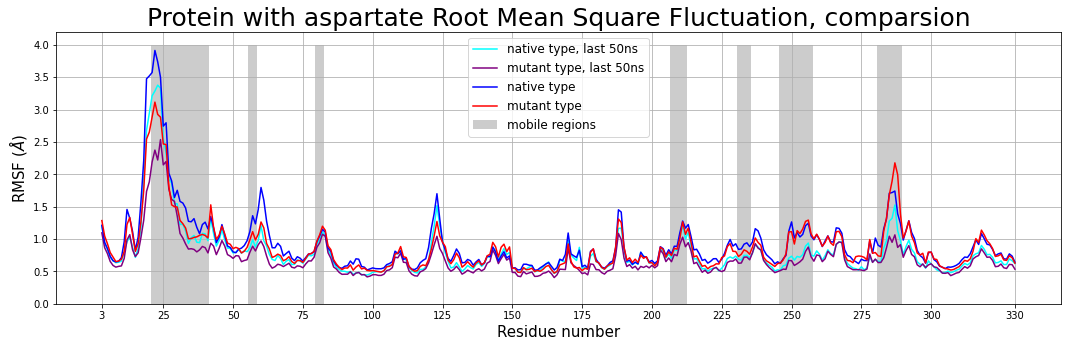

In [64]:
rmsf_plot_asp_50ns_comp = plt.figure(figsize = (18, 5))
ax2 = rmsf_plot_asp_50ns_comp.add_subplot(1, 1, 1)

ax2.plot(x_scale, rmsf_WTasp_50ns.values(), color = 'cyan', label = 'native type, last 50ns')
ax2.plot(x_scale, rmsf_MTasp_50ns.values(), color = 'purple', label = 'mutant type, last 50ns')
ax2.plot(x_scale, rmsf_WTasp.values(), color = 'blue', label = 'native type')
ax2.plot(x_scale, rmsf_MTasp.values(), color = 'red', label = 'mutant type')
ax2.set_xlabel('Residue number', fontsize = 15)
ax2.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax2.set_title('Protein with aspartate Root Mean Square Fluctuation, comparsion', fontsize = 25)
ax2.set_xticks(x_ticks)
ax2.tick_params(labelsize = 10)
ax2.grid(1)
ax2.bar(label_regions, 4, alpha = 0.2, color = 'black', width = 1, label = 'mobile regions')
ax2.legend(fontsize = 12)

rmsf_plot_asp_50ns_comp.savefig('RMSF_asp_50ns_comp.png', dpi = 500)

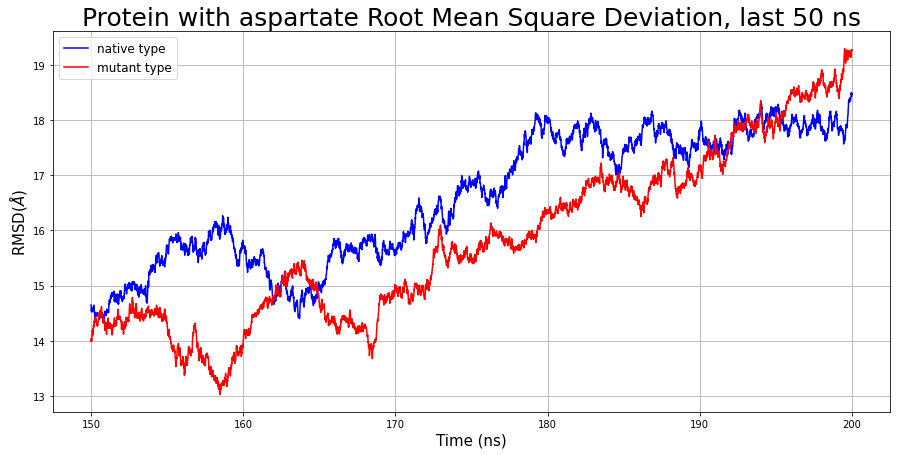

In [18]:
rmsd_WTasp_50ns = []
file = open('rmsd_WTasp_50ns.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_WTasp_50ns.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_WTasp_50ns = np.array(rmsd_WTasp_50ns).T


rmsd_MTasp_50ns = []
file = open('rmsd_MTasp_50ns.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_MTasp_50ns.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_MTasp_50ns = np.array(rmsd_MTasp_50ns).T


rmsd_asp_50ns = plt.figure(figsize = (15, 7))
ax = rmsd_asp_50ns.add_subplot(1, 1, 1)
ax.plot(rmsd_WTasp_50ns[0] / 1000, rmsd_WTasp_50ns[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsd_MTasp_50ns[0] / 1000, rmsd_MTasp_50ns[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Time (ns)', fontsize = 15)
ax.set_ylabel('RMSD($\AA$)',  fontsize = 15)
ax.set_title('Protein with aspartate Root Mean Square Deviation, last 50 ns', fontsize = 25)
ax.grid(1)
ax.tick_params(labelsize = 10)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend(fontsize = 12)
rmsd_asp_50ns.savefig('RMSD_asp_50ns.png', dpi = 500, backend = 'cairo')

## ASPARAGINE

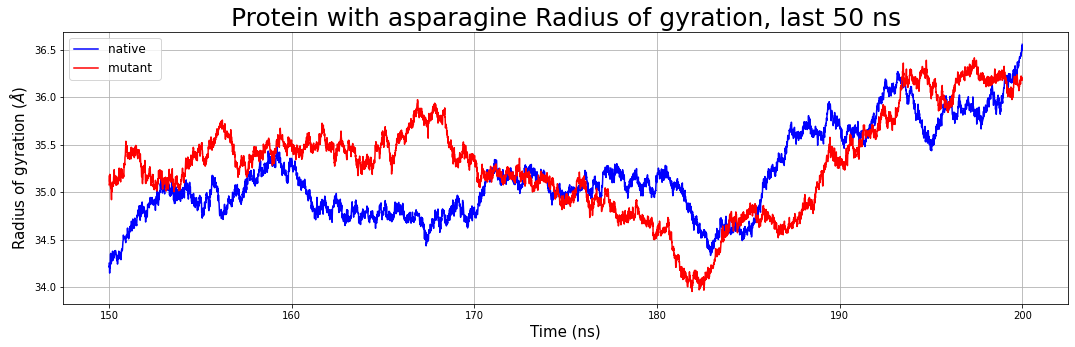

In [19]:
Rg_native_asn_50ns = get_Rg('gyrate_WTasn_50ns.xvg')
Rg_mutant_asn_50ns = get_Rg('gyrate_MTasn_50ns.xvg')

rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_native_asn_50ns[0] / 1000, Rg_native_asn_50ns[1] * 10, color = 'blue', label = 'native ')
ax1.plot(Rg_mutant_asn_50ns[0] / 1000, Rg_mutant_asn_50ns[1] * 10, color = 'red', label = 'mutant ')
ax1.set_xlabel('Time (ns)', fontsize = 15)
ax1.set_ylabel('Radius of gyration ($\AA$)', fontsize = 15)
ax1.set_title('Protein with asparagine Radius of gyration, last 50 ns', fontsize = 25)
ax1.grid(5)
ax.tick_params(labelsize = 10)
ax1.legend(fontsize = 12)
rg_plot.savefig('Rg_asn_50ns.png', dpi = 500)

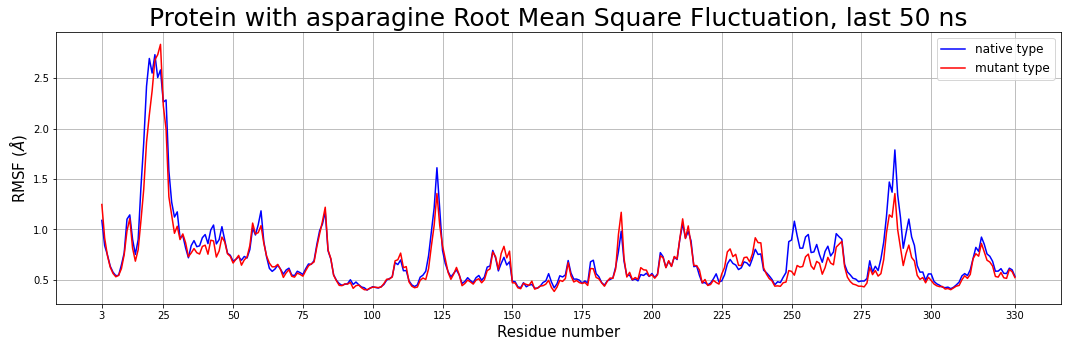

In [20]:
file = open('rmsf_MTasn_50ns.xvg')
rmsf_MTasn_50ns = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_MTasn_50ns.keys():
        rmsf_MTasn_50ns[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_MTasn_50ns[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_MTasn_50ns)
for key, val in rmsf_MTasn_50ns.items():
    rmsf_MTasn_50ns[key] = val / 4 * 10

file = open('rmsf_WTasn_50ns.xvg')
rmsf_WTasn_50ns = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_WTasn_50ns.keys():
        rmsf_WTasn_50ns[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_WTasn_50ns[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_WTasn_50ns)
for key, val in rmsf_WTasn_50ns.items():
    rmsf_WTasn_50ns[key] = val / 4 * 10
    

rmsf_plot_asn_50ns = plt.figure(figsize = (18, 5))
ax = rmsf_plot_asn_50ns.add_subplot(1, 1, 1)
x_scale = [int(x) for x in rmsf_WTasn_50ns.keys()]
x_ticks = [3, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 330]
ax.plot(x_scale, rmsf_WTasn_50ns.values(), color = 'blue', label = 'native type')
ax.plot(x_scale, rmsf_MTasn_50ns.values(), color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number', fontsize = 15)
ax.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax.set_title('Protein with asparagine Root Mean Square Fluctuation, last 50 ns', fontsize = 25)
ax.set_xticks(x_ticks)
ax.tick_params(labelsize = 10)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend(fontsize = 12)

rmsf_plot_asn_50ns.savefig('RMSF_asn_50ns.png', dpi = 500)

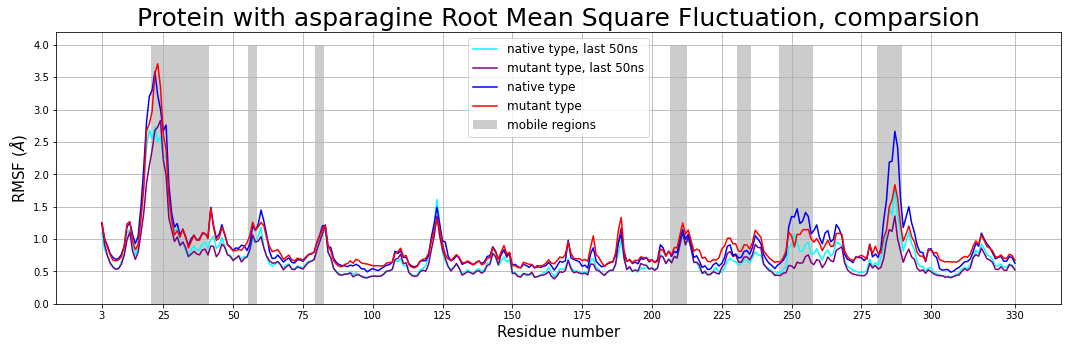

In [63]:
rmsf_plot_asn_50ns_comp = plt.figure(figsize = (18, 5))
ax2 = rmsf_plot_asn_50ns_comp.add_subplot(1, 1, 1)

ax2.plot(x_scale, rmsf_WTasn_50ns.values(), color = 'cyan', label = 'native type, last 50ns')
ax2.plot(x_scale, rmsf_MTasn_50ns.values(), color = 'purple', label = 'mutant type, last 50ns')
ax2.plot(x_scale, rmsf_WTasn.values(), color = 'blue', label = 'native type')
ax2.plot(x_scale, rmsf_MTasn.values(), color = 'red', label = 'mutant type')
ax2.set_xlabel('Residue number', fontsize = 15)
ax2.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax2.set_title('Protein with asparagine Root Mean Square Fluctuation, comparsion', fontsize = 25)
ax2.set_xticks(x_ticks)
ax2.tick_params(labelsize = 10)
ax2.grid(1)
ax2.bar(label_regions, 4, alpha = 0.2, color = 'black', width = 1, label = 'mobile regions')
ax2.legend(fontsize = 12)

rmsf_plot_asn_50ns_comp.savefig('RMSF_asn_50ns_comp.png', dpi = 500)

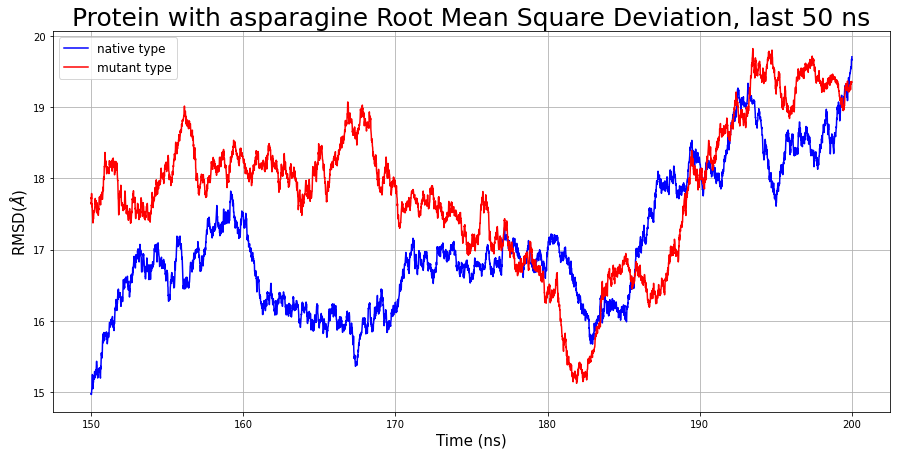

In [22]:
rmsd_WTasn_50ns = []
file = open('rmsd_WTasn_50ns.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_WTasn_50ns.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_WTasn_50ns = np.array(rmsd_WTasn_50ns).T


rmsd_MTasn_50ns = []
file = open('rmsd_MTasn_50ns.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_MTasn_50ns.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_MTasn_50ns = np.array(rmsd_MTasn_50ns).T


rmsd_asn_50ns = plt.figure(figsize = (15, 7))
ax = rmsd_asn_50ns.add_subplot(1, 1, 1)
ax.plot(rmsd_WTasn_50ns[0] / 1000, rmsd_WTasn_50ns[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsd_MTasn_50ns[0] / 1000, rmsd_MTasn_50ns[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Time (ns)', fontsize = 15)
ax.set_ylabel('RMSD($\AA$)',  fontsize = 15)
ax.set_title('Protein with asparagine Root Mean Square Deviation, last 50 ns', fontsize = 25)
ax.grid(1)
ax.tick_params(labelsize = 10)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend(fontsize = 12)
rmsd_asn_50ns.savefig('RMSD_asn_50ns.png', dpi = 500, backend = 'cairo')

## GLUTAMATE

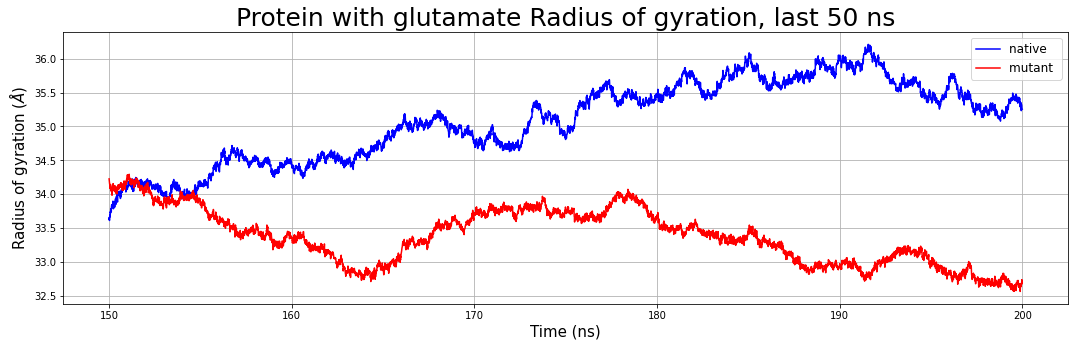

In [23]:
Rg_native_glu_50ns = get_Rg('gyrate_WTglu_50ns.xvg')
Rg_mutant_glu_50ns = get_Rg('gyrate_MTglu_50ns.xvg')

rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_native_glu_50ns[0] / 1000, Rg_native_glu_50ns[1] * 10, color = 'blue', label = 'native ')
ax1.plot(Rg_mutant_glu_50ns[0] / 1000, Rg_mutant_glu_50ns[1] * 10, color = 'red', label = 'mutant ')
ax1.set_xlabel('Time (ns)', fontsize = 15)
ax1.set_ylabel('Radius of gyration ($\AA$)', fontsize = 15)
ax1.set_title('Protein with glutamate Radius of gyration, last 50 ns', fontsize = 25)
ax1.grid(5)
ax.tick_params(labelsize = 10)
ax1.legend(fontsize = 12)
rg_plot.savefig('Rg_glu_50ns.png', dpi = 500)

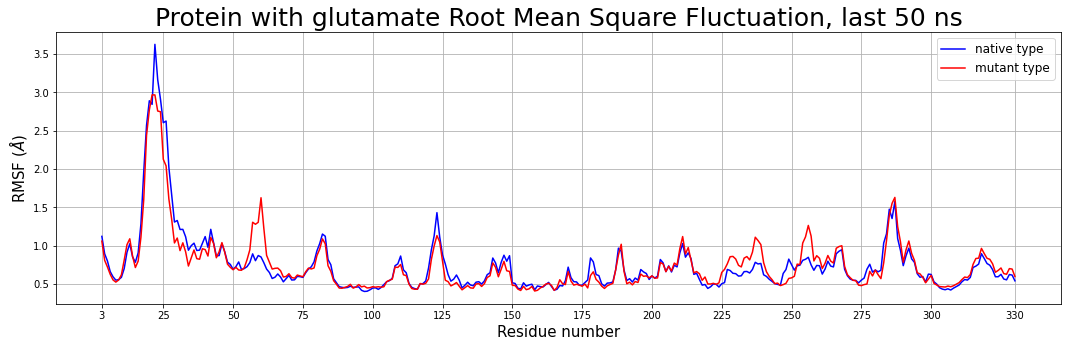

In [24]:
file = open('rmsf_MTglu_50ns.xvg')
rmsf_MTglu_50ns = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_MTglu_50ns.keys():
        rmsf_MTglu_50ns[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_MTglu_50ns[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_MTglu_50ns)
for key, val in rmsf_MTglu_50ns.items():
    rmsf_MTglu_50ns[key] = val / 4 * 10

file = open('rmsf_WTglu_50ns.xvg')
rmsf_WTglu_50ns = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_WTglu_50ns.keys():
        rmsf_WTglu_50ns[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_WTglu_50ns[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_WTglu_50ns)
for key, val in rmsf_WTglu_50ns.items():
    rmsf_WTglu_50ns[key] = val / 4 * 10
    

rmsf_plot_glu_50ns = plt.figure(figsize = (18, 5))
ax = rmsf_plot_glu_50ns.add_subplot(1, 1, 1)
x_scale = [int(x) for x in rmsf_WTglu_50ns.keys()]
x_ticks = [3, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 330]
ax.plot(x_scale, rmsf_WTglu_50ns.values(), color = 'blue', label = 'native type')
ax.plot(x_scale, rmsf_MTglu_50ns.values(), color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number', fontsize = 15)
ax.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax.set_title('Protein with glutamate Root Mean Square Fluctuation, last 50 ns', fontsize = 25)
ax.set_xticks(x_ticks)
ax.tick_params(labelsize = 10)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend(fontsize = 12)

rmsf_plot_glu_50ns.savefig('RMSF_glu_50ns.png', dpi = 500)

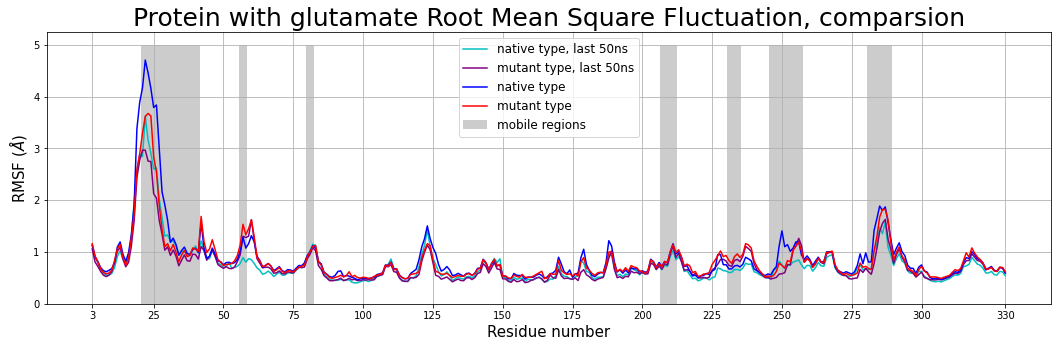

In [62]:
rmsf_plot_glu_50ns_comp = plt.figure(figsize = (18, 5))
ax2 = rmsf_plot_glu_50ns_comp.add_subplot(1, 1, 1)

ax2.plot(x_scale, rmsf_WTglu_50ns.values(), color = 'c', label = 'native type, last 50ns')
ax2.plot(x_scale, rmsf_MTglu_50ns.values(), color = 'purple', label = 'mutant type, last 50ns')
ax2.plot(x_scale, rmsf_WTglu.values(), color = 'b', label = 'native type')
ax2.plot(x_scale, rmsf_MTglu.values(), color = 'r', label = 'mutant type')
ax2.set_xlabel('Residue number', fontsize = 15)
ax2.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax2.set_title('Protein with glutamate Root Mean Square Fluctuation, comparsion', fontsize = 25)
ax2.set_xticks(x_ticks)
ax2.tick_params(labelsize = 10)
ax2.grid(1)
ax2.bar(label_regions, 5, alpha = 0.2, color = 'black', width = 1, label = 'mobile regions')
ax2.legend(fontsize = 12)

rmsf_plot_glu_50ns_comp.savefig('RMSF_glu_50ns_comp.png', dpi = 500)

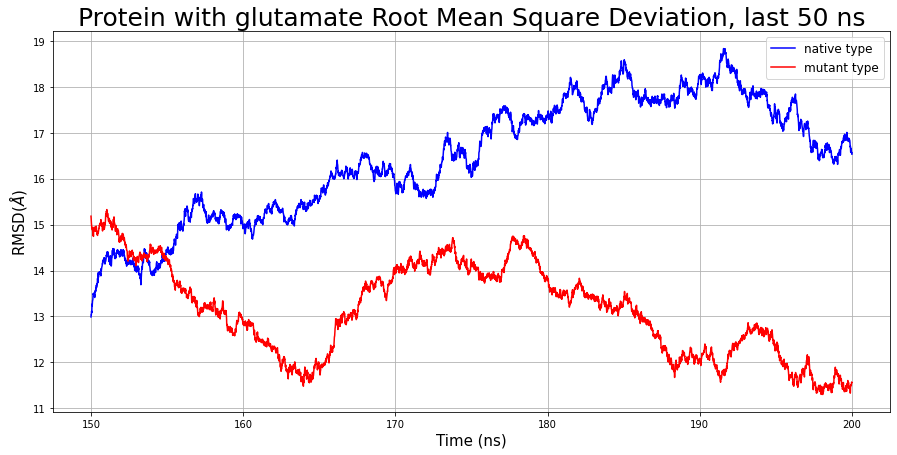

In [26]:
rmsd_WTglu_50ns = []
file = open('rmsd_WTglu_50ns.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_WTglu_50ns.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_WTglu_50ns = np.array(rmsd_WTglu_50ns).T


rmsd_MTglu_50ns = []
file = open('rmsd_MTglu_50ns.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_MTglu_50ns.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_MTglu_50ns = np.array(rmsd_MTglu_50ns).T


rmsd_glu_50ns = plt.figure(figsize = (15, 7))
ax = rmsd_glu_50ns.add_subplot(1, 1, 1)
ax.plot(rmsd_WTglu_50ns[0] / 1000, rmsd_WTglu_50ns[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsd_MTglu_50ns[0] / 1000, rmsd_MTglu_50ns[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Time (ns)', fontsize = 15)
ax.set_ylabel('RMSD($\AA$)',  fontsize = 15)
ax.set_title('Protein with glutamate Root Mean Square Deviation, last 50 ns', fontsize = 25)
ax.grid(1)
ax.tick_params(labelsize = 10)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend(fontsize = 12)
rmsd_glu_50ns.savefig('RMSD_glu_50ns.png', dpi = 500, backend = 'cairo')

## GLUTAMINE

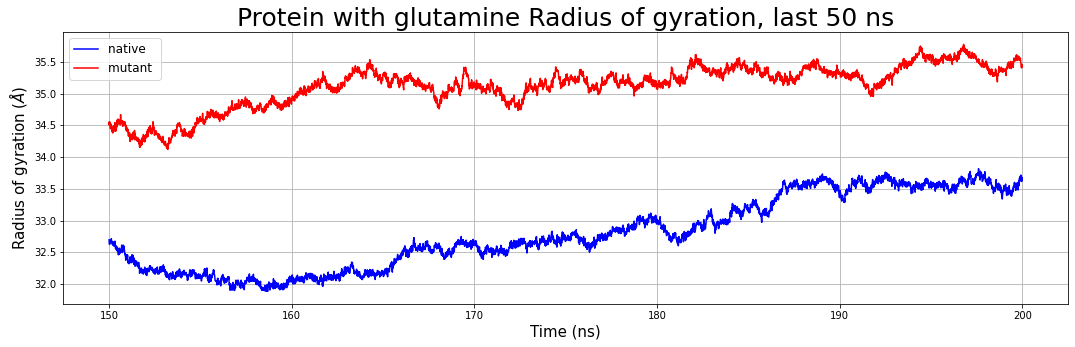

In [27]:
Rg_native_gln_50ns = get_Rg('gyrate_WTgln_50ns.xvg')
Rg_mutant_gln_50ns = get_Rg('gyrate_MTgln_50ns.xvg')

rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_native_gln_50ns[0] / 1000, Rg_native_gln_50ns[1] * 10, color = 'blue', label = 'native ')
ax1.plot(Rg_mutant_gln_50ns[0] / 1000, Rg_mutant_gln_50ns[1] * 10, color = 'red', label = 'mutant ')
ax1.set_xlabel('Time (ns)', fontsize = 15)
ax1.set_ylabel('Radius of gyration ($\AA$)', fontsize = 15)
ax1.set_title('Protein with glutamine Radius of gyration, last 50 ns', fontsize = 25)
ax1.grid(5)
ax.tick_params(labelsize = 10)
ax1.legend(fontsize = 12)
rg_plot.savefig('Rg_gln_50ns.png', dpi = 500)

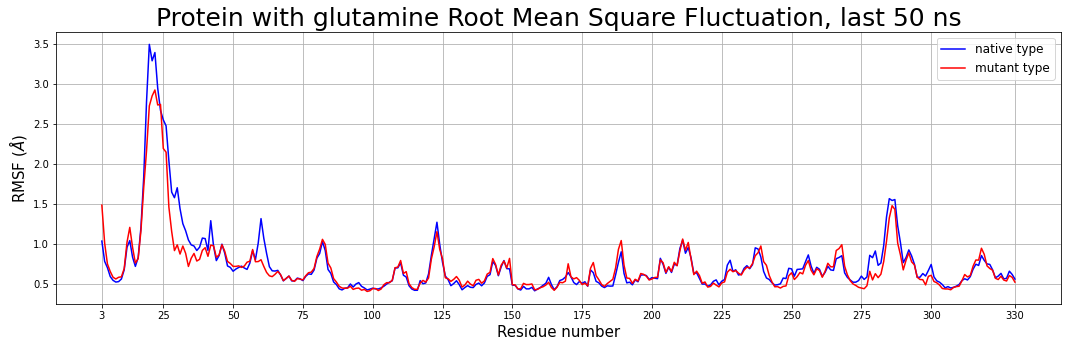

In [28]:
file = open('rmsf_MTgln_50ns.xvg')
rmsf_MTgln_50ns = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_MTgln_50ns.keys():
        rmsf_MTgln_50ns[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_MTgln_50ns[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_MTgln_50ns)
for key, val in rmsf_MTgln_50ns.items():
    rmsf_MTgln_50ns[key] = val / 4 * 10

file = open('rmsf_WTgln_50ns.xvg')
rmsf_WTgln_50ns = {}
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    if tmp[0] in rmsf_WTgln_50ns.keys():
        rmsf_WTgln_50ns[tmp[0]] += float(tmp[1])
    elif int(tmp[0]) > 330:
        continue
    else:
        rmsf_WTgln_50ns[tmp[0]] = float(tmp[1])
file.close()
#print(rmsf_WTgln_50ns)
for key, val in rmsf_WTgln_50ns.items():
    rmsf_WTgln_50ns[key] = val / 4 * 10
    

rmsf_plot_gln_50ns = plt.figure(figsize = (18, 5))
ax = rmsf_plot_gln_50ns.add_subplot(1, 1, 1)
x_scale = [int(x) for x in rmsf_WTgln_50ns.keys()]
x_ticks = [3, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 330]
ax.plot(x_scale, rmsf_WTgln_50ns.values(), color = 'blue', label = 'native type')
ax.plot(x_scale, rmsf_MTgln_50ns.values(), color = 'red', label = 'mutant type')
ax.set_xlabel('Residue number', fontsize = 15)
ax.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax.set_title('Protein with glutamine Root Mean Square Fluctuation, last 50 ns', fontsize = 25)
ax.set_xticks(x_ticks)
ax.tick_params(labelsize = 10)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend(fontsize = 12)

rmsf_plot_gln_50ns.savefig('RMSF_gln_50ns.png', dpi = 500)

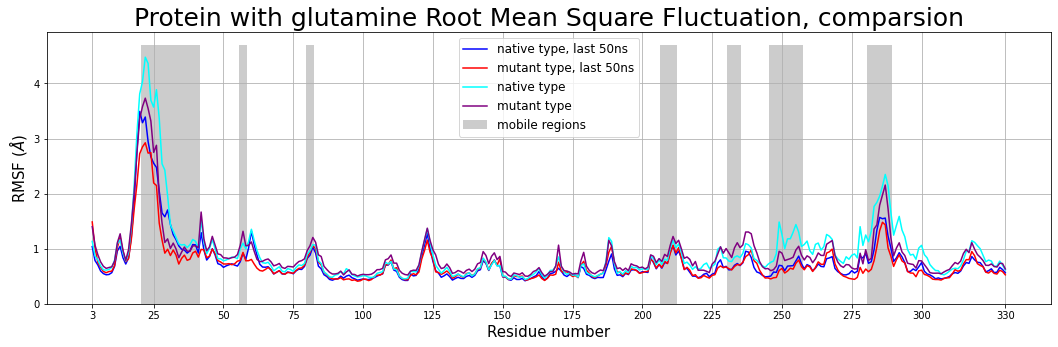

In [61]:
rmsf_plot_gln_50ns_comp = plt.figure(figsize = (18, 5))
ax2 = rmsf_plot_gln_50ns_comp.add_subplot(1, 1, 1)

ax2.plot(x_scale, rmsf_WTgln_50ns.values(), color = 'blue', label = 'native type, last 50ns')
ax2.plot(x_scale, rmsf_MTgln_50ns.values(), color = 'red', label = 'mutant type, last 50ns')
ax2.plot(x_scale, rmsf_WTgln.values(), color = 'cyan', label = 'native type')
ax2.plot(x_scale, rmsf_MTgln.values(), color = 'purple', label = 'mutant type')
ax2.set_xlabel('Residue number', fontsize = 15)
ax2.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax2.set_title('Protein with glutamine Root Mean Square Fluctuation, comparsion', fontsize = 25)
ax2.set_xticks(x_ticks)
ax2.tick_params(labelsize = 10)
ax2.grid(1)
ax2.bar(label_regions, 4.7, alpha = 0.2, color = 'black', width = 1, label = 'mobile regions')
ax2.legend(fontsize = 12)

rmsf_plot_gln_50ns_comp.savefig('RMSF_gln_50ns_comp.png', dpi = 500)

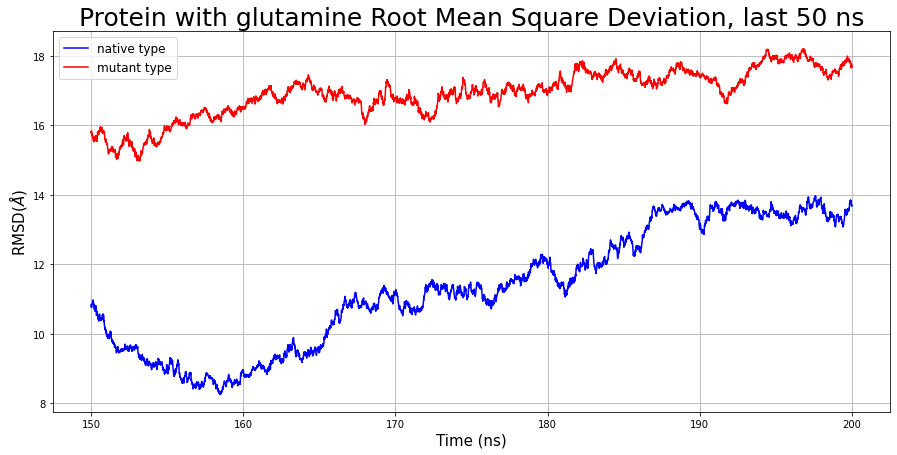

In [30]:
rmsd_WTgln_50ns = []
file = open('rmsd_WTgln_50ns.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_WTgln_50ns.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_WTgln_50ns = np.array(rmsd_WTgln_50ns).T


rmsd_MTgln_50ns = []
file = open('rmsd_MTgln_50ns.xvg', 'r')
for line in file:
    if '#' in line or '@' in line:
        continue
    tmp = line.split()
    rmsd_MTgln_50ns.append((float(tmp[0]), float(tmp[1])))
file.close()
rmsd_MTgln_50ns = np.array(rmsd_MTgln_50ns).T


rmsd_gln_50ns = plt.figure(figsize = (15, 7))
ax = rmsd_gln_50ns.add_subplot(1, 1, 1)
ax.plot(rmsd_WTgln_50ns[0] / 1000, rmsd_WTgln_50ns[1] * 10, color = 'blue', label = 'native type')
ax.plot(rmsd_MTgln_50ns[0] / 1000, rmsd_MTgln_50ns[1] * 10, color = 'red', label = 'mutant type')
ax.set_xlabel('Time (ns)', fontsize = 15)
ax.set_ylabel('RMSD($\AA$)',  fontsize = 15)
ax.set_title('Protein with glutamine Root Mean Square Deviation, last 50 ns', fontsize = 25)
ax.grid(1)
ax.tick_params(labelsize = 10)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.legend(fontsize = 12)
rmsd_gln_50ns.savefig('RMSD_gln_50ns.png', dpi = 500, backend = 'cairo')

## ALL MUTANTS

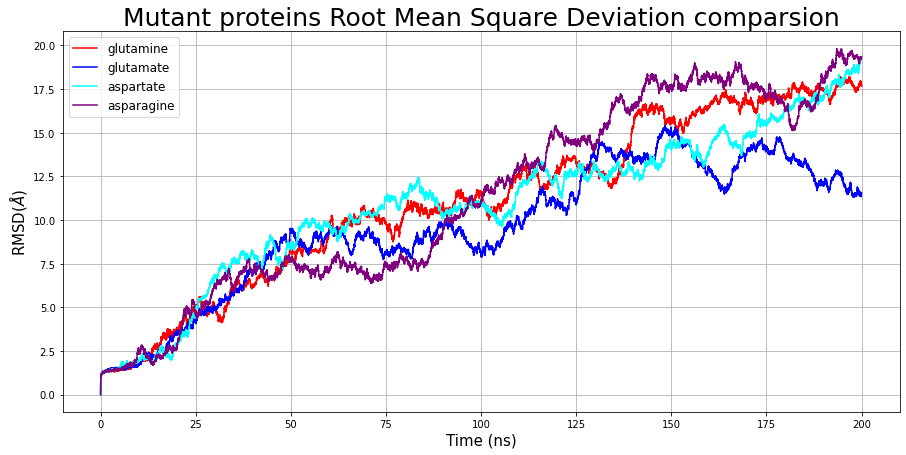

In [31]:
rmsd_mut_comp = plt.figure(figsize = (15, 7))
ax = rmsd_mut_comp.add_subplot(1, 1, 1)
ax.plot(rmsd_MTgln[0] / 1000, rmsd_MTgln[1] * 10, color = 'red', label = 'glutamine')
ax.plot(rmsd_MTglu[0] / 1000, rmsd_MTglu[1] * 10, color = 'blue', label = 'glutamate')
ax.plot(rmsd_MTasp[0] / 1000, rmsd_MTasp[1] * 10, color = 'cyan', label = 'aspartate')
ax.plot(rmsd_MTasn[0] / 1000, rmsd_MTasn[1] * 10, color = 'purple', label = 'asparagine')
ax.set_xlabel('Time (ns)', fontsize = 15)
ax.set_ylabel('RMSD($\AA$)', fontsize = 15)
ax.set_title('Mutant proteins Root Mean Square Deviation comparsion', fontsize = 25)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.tick_params(labelsize = 10)
ax.legend(fontsize = 12)
rmsd_mut_comp.savefig('rmsd_mut_comp.png', dpi = 500, backend = 'cairo')

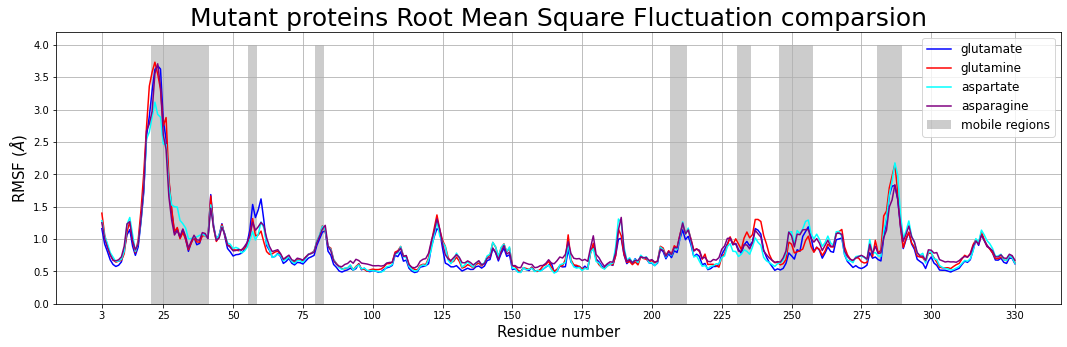

In [60]:
rmsf_mut_comp = plt.figure(figsize = (18, 5))
ax2 = rmsf_mut_comp.add_subplot(1, 1, 1)

ax2.plot(x_scale, rmsf_MTglu.values(), color = 'blue', label = 'glutamate')
ax2.plot(x_scale, rmsf_MTgln.values(), color = 'red', label = 'glutamine')
ax2.plot(x_scale, rmsf_MTasp.values(), color = 'cyan', label = 'aspartate')
ax2.plot(x_scale, rmsf_MTasn.values(), color = 'purple', label = 'asparagine')
ax2.set_xlabel('Residue number', fontsize = 15)
ax2.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax2.set_title('Mutant proteins Root Mean Square Fluctuation comparsion', fontsize = 25)
ax2.set_xticks(x_ticks)
ax2.tick_params(labelsize = 10)
ax2.grid(1)
ax2.bar(label_regions, 4, alpha = 0.2, color = 'black', width = 1, label = 'mobile regions')
ax2.legend(fontsize = 12)

rmsf_mut_comp.savefig('RMSF_mut_comp.png', dpi = 500)

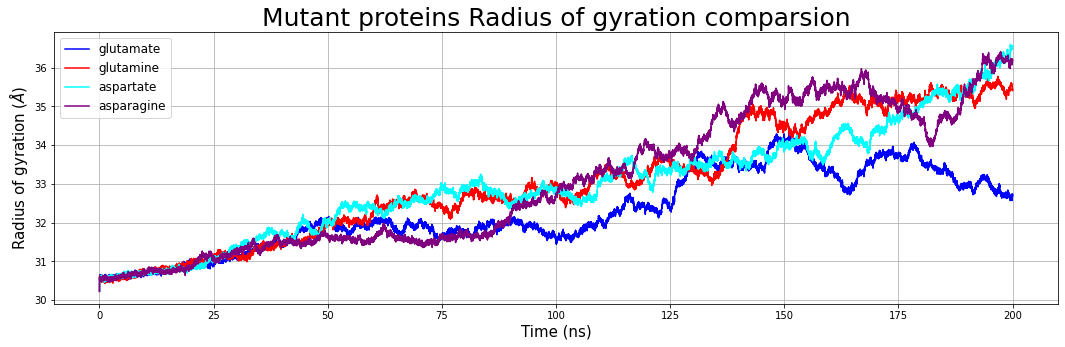

In [33]:
rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_MTglu[0] / 1000, Rg_MTglu[1] * 10, color = 'blue', label = 'glutamate')
ax1.plot(Rg_MTgln[0] / 1000, Rg_MTgln[1] * 10, color = 'red', label = 'glutamine')
ax1.plot(Rg_mutant_asp[0] / 1000, Rg_mutant_asp[1] * 10, color = 'cyan', label = 'aspartate')
ax1.plot(Rg_MTasn[0] / 1000, Rg_MTasn[1] * 10, color = 'purple', label = 'asparagine')
ax1.set_xlabel('Time (ns)', fontsize = 15)
ax1.set_ylabel('Radius of gyration ($\AA$)', fontsize = 15)
ax1.set_title('Mutant proteins Radius of gyration comparsion', fontsize = 25)
ax1.grid(5)
ax.tick_params(labelsize = 10)
ax1.legend(fontsize = 12)
rg_plot.savefig('Rg_mut_comp.png', dpi = 500)

## ALL NATIVE

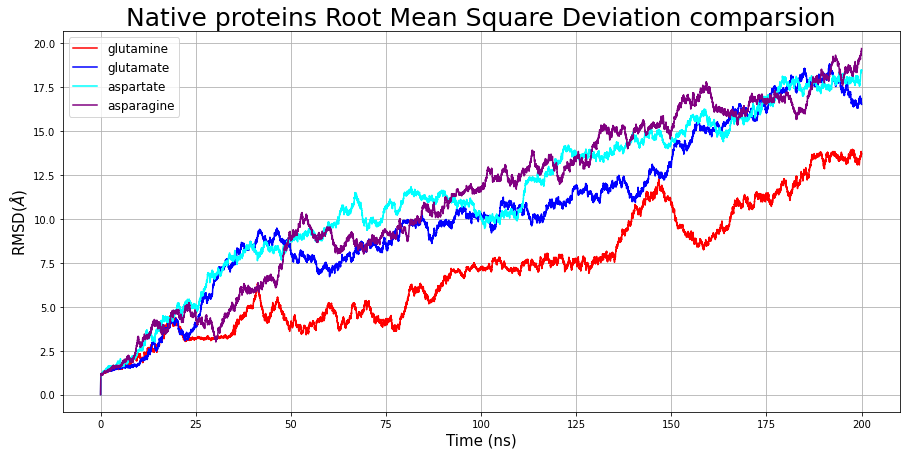

In [34]:
rmsd_wild_comp = plt.figure(figsize = (15, 7))
ax = rmsd_wild_comp.add_subplot(1, 1, 1)
ax.plot(rmsd_WTgln[0] / 1000, rmsd_WTgln[1] * 10, color = 'red', label = 'glutamine')
ax.plot(rmsd_WTglu[0] / 1000, rmsd_WTglu[1] * 10, color = 'blue', label = 'glutamate')
ax.plot(rmsd_WTasp[0] / 1000, rmsd_WTasp[1] * 10, color = 'cyan', label = 'aspartate')
ax.plot(rmsd_WTasn[0] / 1000, rmsd_WTasn[1] * 10, color = 'purple', label = 'asparagine')
ax.set_xlabel('Time (ns)', fontsize = 15)
ax.set_ylabel('RMSD($\AA$)', fontsize = 15)
ax.set_title('Native proteins Root Mean Square Deviation comparsion', fontsize = 25)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.tick_params(labelsize = 10)
ax.legend(fontsize = 12)
rmsd_wild_comp.savefig('rmsd_wild_comp.png', dpi = 500, backend = 'cairo')

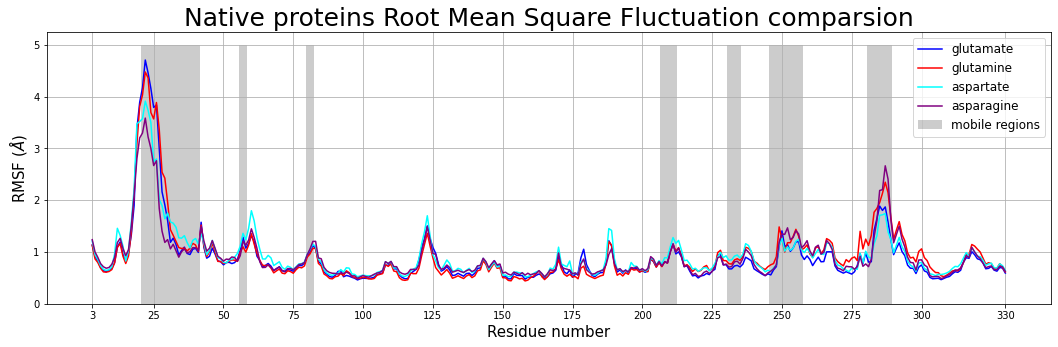

In [59]:
rmsf_wild_comp = plt.figure(figsize = (18, 5))
ax2 = rmsf_wild_comp.add_subplot(1, 1, 1)

ax2.plot(x_scale, rmsf_WTglu.values(), color = 'blue', label = 'glutamate')
ax2.plot(x_scale, rmsf_WTgln.values(), color = 'red', label = 'glutamine')
ax2.plot(x_scale, rmsf_WTasp.values(), color = 'cyan', label = 'aspartate')
ax2.plot(x_scale, rmsf_WTasn.values(), color = 'purple', label = 'asparagine')
ax2.set_xlabel('Residue number', fontsize = 15)
ax2.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax2.set_title('Native proteins Root Mean Square Fluctuation comparsion', fontsize = 25)
ax2.set_xticks(x_ticks)
ax2.tick_params(labelsize = 10)
ax2.grid(1)
ax2.bar(label_regions, 5, alpha = 0.2, color = 'black', width = 1, label = 'mobile regions')
ax2.legend(fontsize = 12)

rmsf_wild_comp.savefig('RMSF_wild_comp.png', dpi = 500)

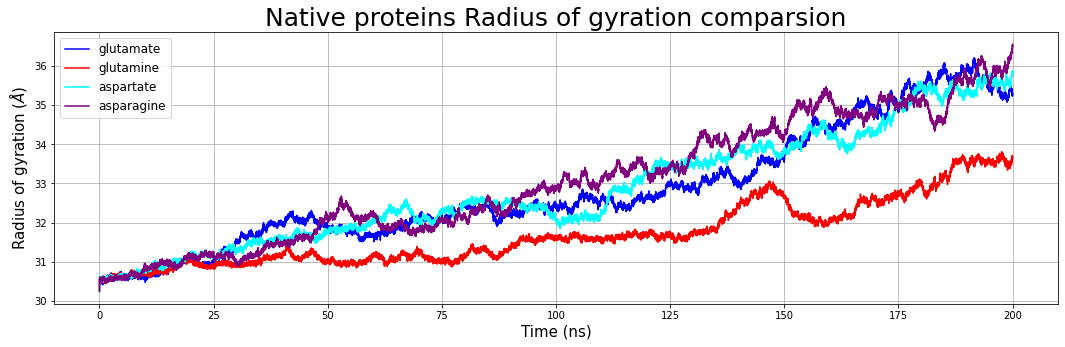

In [36]:
rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_WTglu[0] / 1000, Rg_WTglu[1] * 10, color = 'blue', label = 'glutamate')
ax1.plot(Rg_WTgln[0] / 1000, Rg_WTgln[1] * 10, color = 'red', label = 'glutamine')
ax1.plot(Rg_native_asp[0] / 1000, Rg_native_asp[1] * 10, color = 'cyan', label = 'aspartate')
ax1.plot(Rg_WTasn[0] / 1000, Rg_WTasn[1] * 10, color = 'purple', label = 'asparagine')
ax1.set_xlabel('Time (ns)', fontsize = 15)
ax1.set_ylabel('Radius of gyration ($\AA$)', fontsize = 15)
ax1.set_title('Native proteins Radius of gyration comparsion', fontsize = 25)
ax1.grid(5)
ax.tick_params(labelsize = 10)
ax1.legend(fontsize = 12)
rg_plot.savefig('Rg_wild_comp.png', dpi = 500)

## Substrate-product comparison

## ASPARAGINE-ASPARTATE

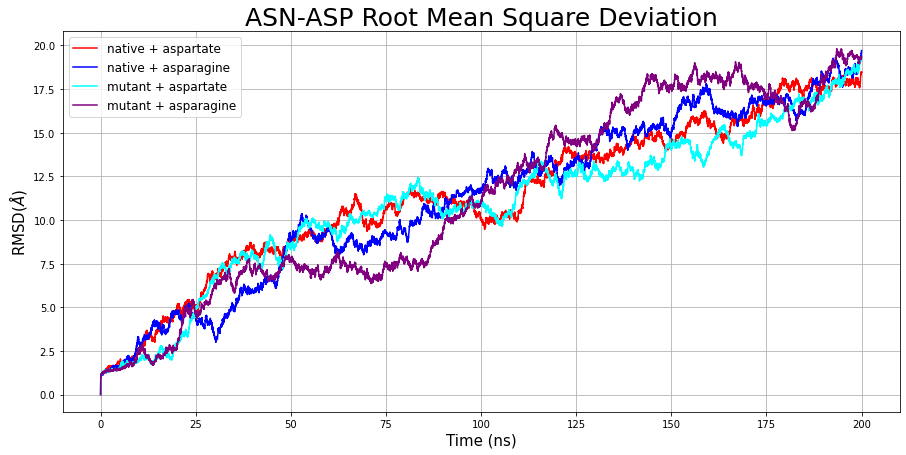

In [37]:
rmsd_asn_asp_comp = plt.figure(figsize = (15, 7))
ax = rmsd_asn_asp_comp.add_subplot(1, 1, 1)
ax.plot(rmsd_WTasp[0] / 1000, rmsd_WTasp[1] * 10, color = 'red', label = 'native + aspartate')
ax.plot(rmsd_WTasn[0] / 1000, rmsd_WTasn[1] * 10, color = 'blue', label = 'native + asparagine')
ax.plot(rmsd_MTasp[0] / 1000, rmsd_MTasp[1] * 10, color = 'cyan', label = 'mutant + aspartate')
ax.plot(rmsd_MTasn[0] / 1000, rmsd_MTasn[1] * 10, color = 'purple', label = 'mutant + asparagine')
ax.set_xlabel('Time (ns)', fontsize = 15)
ax.set_ylabel('RMSD($\AA$)', fontsize = 15)
ax.set_title('ASN-ASP Root Mean Square Deviation', fontsize = 25)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.tick_params(labelsize = 10)
ax.legend(fontsize = 12)
rmsd_asn_asp_comp.savefig('rmsd_asn-asp_comp.png', dpi = 500, backend = 'cairo')

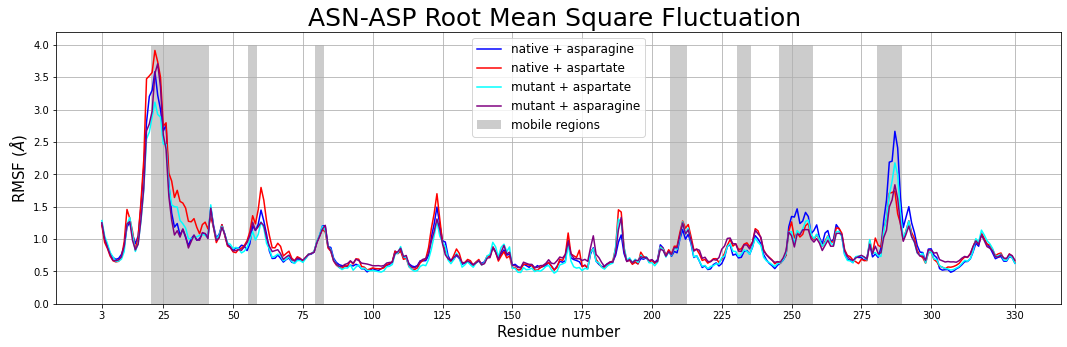

In [66]:
rmsf_asn_asp_comp = plt.figure(figsize = (18, 5))
ax2 = rmsf_asn_asp_comp.add_subplot(1, 1, 1)

ax2.plot(x_scale, rmsf_WTasn.values(), color = 'blue', label = 'native + asparagine')
ax2.plot(x_scale, rmsf_WTasp.values(), color = 'red', label = 'native + aspartate')
ax2.plot(x_scale, rmsf_MTasp.values(), color = 'cyan', label = 'mutant + aspartate')
ax2.plot(x_scale, rmsf_MTasn.values(), color = 'purple', label = 'mutant + asparagine')
ax2.set_xlabel('Residue number', fontsize = 15)
ax2.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax2.set_title('ASN-ASP Root Mean Square Fluctuation ', fontsize = 25)
ax2.set_xticks(x_ticks)
ax2.tick_params(labelsize = 10)
ax2.grid(1)
ax2.bar(label_regions, 4, alpha = 0.2, color = 'black', width = 1, label = 'mobile regions')
ax2.legend(fontsize = 12)

rmsf_asn_asp_comp.savefig('RMSF_asn_asp_comp.png', dpi = 500)

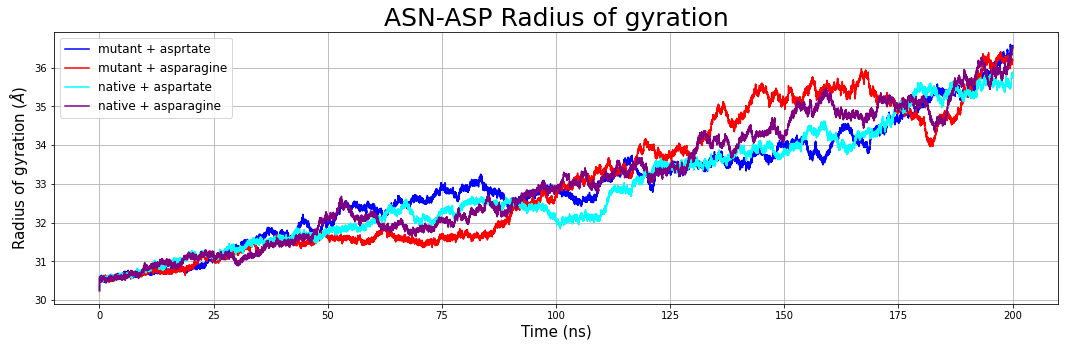

In [39]:
rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_mutant_asp[0] / 1000, Rg_mutant_asp[1] * 10, color = 'blue', label = 'mutant + asprtate')
ax1.plot(Rg_MTasn[0] / 1000, Rg_MTasn[1] * 10, color = 'red', label = 'mutant + asparagine')
ax1.plot(Rg_native_asp[0] / 1000, Rg_native_asp[1] * 10, color = 'cyan', label = 'native + aspartate')
ax1.plot(Rg_WTasn[0] / 1000, Rg_WTasn[1] * 10, color = 'purple', label = 'native + asparagine')
ax1.set_xlabel('Time (ns)', fontsize = 15)
ax1.set_ylabel('Radius of gyration ($\AA$)', fontsize = 15)
ax1.set_title('ASN-ASP Radius of gyration', fontsize = 25)
ax1.grid(5)
ax.tick_params(labelsize = 10)
ax1.legend(fontsize = 12)
rg_plot.savefig('Rg_asn_asp_comp.png', dpi = 500)

## GLUTAMINE-GLUTAMATE

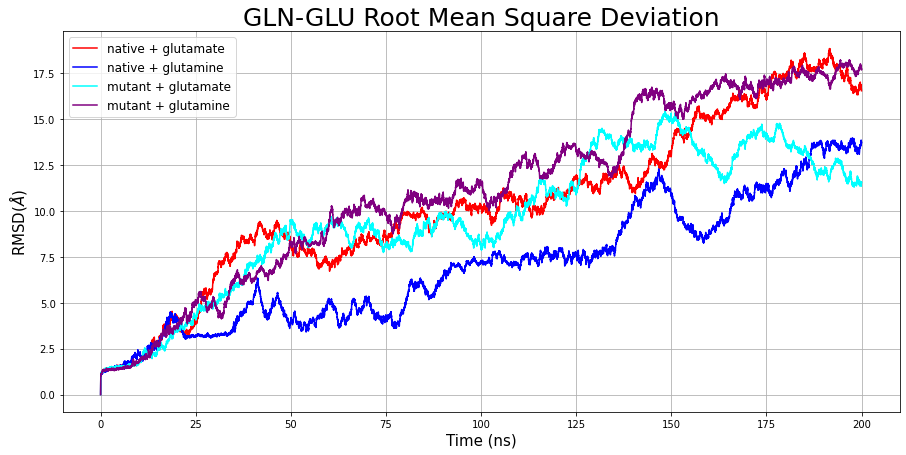

In [40]:
rmsd_gln_glu_comp = plt.figure(figsize = (15, 7))
ax = rmsd_gln_glu_comp.add_subplot(1, 1, 1)
ax.plot(rmsd_WTglu[0] / 1000, rmsd_WTglu[1] * 10, color = 'red', label = 'native + glutamate')
ax.plot(rmsd_WTgln[0] / 1000, rmsd_WTgln[1] * 10, color = 'blue', label = 'native + glutamine')
ax.plot(rmsd_MTglu[0] / 1000, rmsd_MTglu[1] * 10, color = 'cyan', label = 'mutant + glutamate')
ax.plot(rmsd_MTgln[0] / 1000, rmsd_MTgln[1] * 10, color = 'purple', label = 'mutant + glutamine')
ax.set_xlabel('Time (ns)', fontsize = 15)
ax.set_ylabel('RMSD($\AA$)', fontsize = 15)
ax.set_title('GLN-GLU Root Mean Square Deviation', fontsize = 25)
ax.grid(1)
#ax.bar(mutations, 6, alpha = 0.2, color = 'black', width = 4, label = 'mutation region')
ax.tick_params(labelsize = 10)
ax.legend(fontsize = 12)
rmsd_gln_glu_comp.savefig('rmsd_gln-glu_comp.png', dpi = 500, backend = 'cairo')

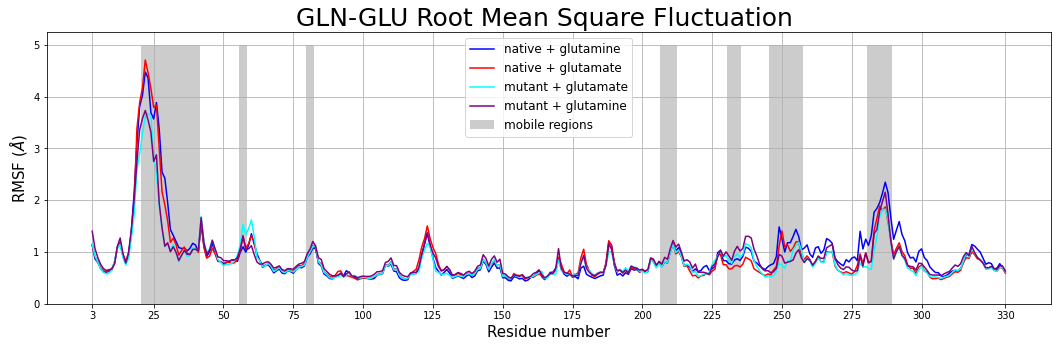

In [65]:
rmsf_gln_glu_comp = plt.figure(figsize = (18, 5))
ax2 = rmsf_gln_glu_comp.add_subplot(1, 1, 1)

ax2.plot(x_scale, rmsf_WTgln.values(), color = 'blue', label = 'native + glutamine')
ax2.plot(x_scale, rmsf_WTglu.values(), color = 'red', label = 'native + glutamate')
ax2.plot(x_scale, rmsf_MTglu.values(), color = 'cyan', label = 'mutant + glutamate')
ax2.plot(x_scale, rmsf_MTgln.values(), color = 'purple', label = 'mutant + glutamine')
ax2.set_xlabel('Residue number', fontsize = 15)
ax2.set_ylabel('RMSF ($\AA$)', fontsize = 15)
ax2.set_title('GLN-GLU Root Mean Square Fluctuation ', fontsize = 25)
ax2.set_xticks(x_ticks)
ax2.tick_params(labelsize = 10)
ax2.grid(1)
ax2.bar(label_regions, 5, alpha = 0.2, color = 'black', width = 1, label = 'mobile regions')
ax2.legend(fontsize = 12)

rmsf_gln_glu_comp.savefig('RMSF_gln_glu_comp.png', dpi = 500)

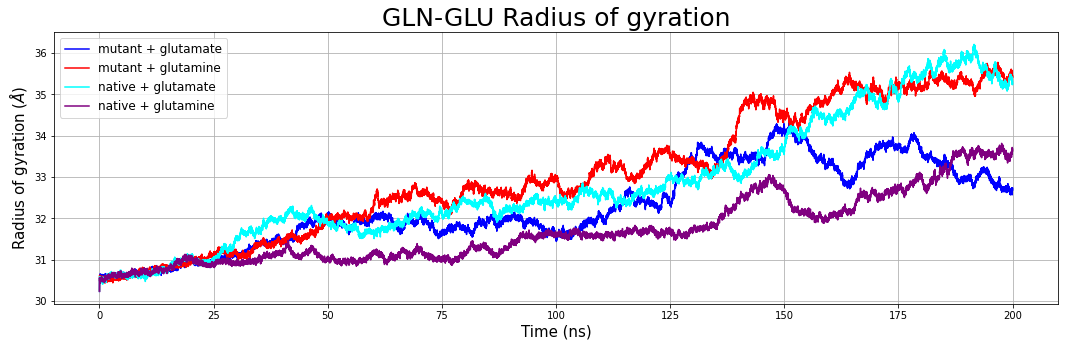

In [42]:
rg_plot = plt.figure(figsize = (18, 5))
ax1 = rg_plot.add_subplot(1, 1, 1)
ax1.plot(Rg_MTglu[0] / 1000, Rg_MTglu[1] * 10, color = 'blue', label = 'mutant + glutamate')
ax1.plot(Rg_MTgln[0] / 1000, Rg_MTgln[1] * 10, color = 'red', label = 'mutant + glutamine')
ax1.plot(Rg_WTglu[0] / 1000, Rg_WTglu[1] * 10, color = 'cyan', label = 'native + glutamate')
ax1.plot(Rg_WTgln[0] / 1000, Rg_WTgln[1] * 10, color = 'purple', label = 'native + glutamine')
ax1.set_xlabel('Time (ns)', fontsize = 15)
ax1.set_ylabel('Radius of gyration ($\AA$)', fontsize = 15)
ax1.set_title('GLN-GLU Radius of gyration', fontsize = 25)
ax1.grid(5)
ax.tick_params(labelsize = 10)
ax1.legend(fontsize = 12)
rg_plot.savefig('Rg_gln_glu_comp.png', dpi = 500)